# H/V curve spatial interpolation

In [1]:
import numpy as np
import pandas as pd
import os
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## Import .hv files created by Geopsy that contains HV curves

In [2]:
path = './Profile/'
files = os.listdir(path)

In [3]:
files.sort()

In [4]:
print(files)

['BE_01250.hv', 'BE_01250.log', 'BE_03484.hv', 'BE_03484.log', 'BE_03625.hv', 'BE_03625.log', 'BE_04444.hv', 'BE_04444.log', 'BE_04465.hv', 'BE_04465.log', 'BE_04512.hv', 'BE_04512.log', 'BE_04639.hv', 'BE_04639.log', 'BE_04744.hv', 'BE_04744.log', 'BE_04823.hv', 'BE_04823.log', 'BE_13956.hv', 'BE_13956.log', 'BE_19524.hv', 'BE_19524.log', 'BE_20066.hv', 'BE_20066.log', 'Location_transect1.csv', 'Location_transect1_lambert20008.csv']


### Extracting the frequency, the HV amplitude for the profile

In [5]:
namestt = []

i = 0
for file in files :
    if file[-3:] != '.hv' :
        continue
        
    df = pd.read_csv(path+file, skiprows=8, delimiter='\t')
    
    if i == 0 :
        Amp = np.array(df.Average).reshape(len(df.Average),1)
        frq = np.array(df['# Frequency']).reshape(len(df['# Frequency']),1)
    else : 
        Amp = np.append(Amp, np.array(df.Average).reshape(len(df.Average),1), axis=1)
        frq = np.append(frq, np.array(df['# Frequency']).reshape(len(df['# Frequency']),1), axis=1)
    namestt.append(file[:-3])
    i+=1

In [6]:
Amp, frq, namestt

(array([[1.61015 , 1.32682 , 0.913736, ..., 0.853768, 1.18322 , 2.63748 ],
        [1.64011 , 1.31045 , 0.895587, ..., 0.841123, 1.18962 , 2.65134 ],
        [1.65775 , 1.29509 , 0.877775, ..., 0.835493, 1.18498 , 2.68613 ],
        ...,
        [0.836011, 0.621735, 0.969061, ..., 1.10838 , 0.642615, 1.12769 ],
        [0.701335, 0.685504, 1.17165 , ..., 1.07286 , 0.615694, 1.03179 ],
        [1.01237 , 1.00892 , 1.01682 , ..., 1.01697 , 0.997766, 1.0368  ]]),
 array([[  0.505068,   0.505068,   0.505068, ...,   0.505068,   0.505068,
           0.505068],
        [  0.530321,   0.530321,   0.530321, ...,   0.530321,   0.530321,
           0.530321],
        [  0.556837,   0.556837,   0.556837, ...,   0.556837,   0.556837,
           0.556837],
        ...,
        [445.31    , 445.31    , 445.31    , ..., 445.31    , 445.31    ,
         445.31    ],
        [467.575   , 467.575   , 467.575   , ..., 467.575   , 467.575   ,
         467.575   ],
        [490.954   , 490.954   , 490.954  

## Import location and altitude of each node

### Import location - Must be in metric system

In [7]:
loc = pd.read_csv(path+'Location_transect1_lambert20008.csv')

In [8]:
loc.sort_values(by=['GeophoneNumber'])

,fid,GeophoneNumber,Latitude,Longitude,Northing,xlamb,ylamb
3,4,453001250,50.680822,4.644348,20.4525,669479.333677,652286.779592
4,5,453003484,50.680508,4.644820,16.0580,669512.802157,652252.007923
11,12,453003625,50.678167,4.647963,-36.2910,669735.936477,651992.430768
10,11,453004444,50.678616,4.647946,36.4550,669734.552484,652042.389247
8,9,453004465,50.679451,4.647600,28.7705,669709.749681,652135.119289
2,3,453004512,50.681220,4.644024,21.8170,669456.259649,652331.000791
7,8,453004639,50.680014,4.646788,-15.3510,669652.089400,652197.502616
5,6,453004744,50.680323,4.645455,38.6730,669557.753360,652231.602356
0,1,453004823,50.682036,4.643263,34.9640,669402.154385,652421.496504
6,7,453013956,50.680211,4.646082,-38.3910,669602.090619,652219.297233


### Import altitude

In [9]:
alti = pd.read_csv(path+'Location_transect1.csv')

In [10]:
alti.sort_values(by=['GeophoneNumber'])

,GeophoneNumber,Latitude,Longitude,Northing,Altitude
3,453001250,50.680822,4.644348,20.4525,110.23
4,453003484,50.680508,4.644820,16.0580,106.20
11,453003625,50.678167,4.647963,-36.2910,101.66
10,453004444,50.678616,4.647946,36.4550,101.26
8,453004465,50.679451,4.647600,28.7705,99.35
2,453004512,50.681220,4.644024,21.8170,112.08
7,453004639,50.680014,4.646788,-15.3510,97.89
5,453004744,50.680323,4.645455,38.6730,99.52
0,453004823,50.682036,4.643263,34.9640,112.93
6,453013956,50.680211,4.646082,-38.3910,98.32


## Converting the frequency into depth - Van Noten et al 2015 pp 43-44
https://publi2-as.oma.be/record/1802/files/VanNotenetal2015_Final%20Report%20MO-33-028_BELSPO.pdf

In [11]:
depth = 129.29*frq**(-1.733)

NodeAlti = np.zeros(depth.shape)
NodeLat = np.zeros(depth.shape)

### Verify the data shape

In [12]:
depth.shape, NodeAlti.shape, Amp.shape

((142, 12), (142, 12), (142, 12))

### Plotting the result in a profile

Text(0.5, 0, 'Distance (m) - Northing\nLambert 2008')

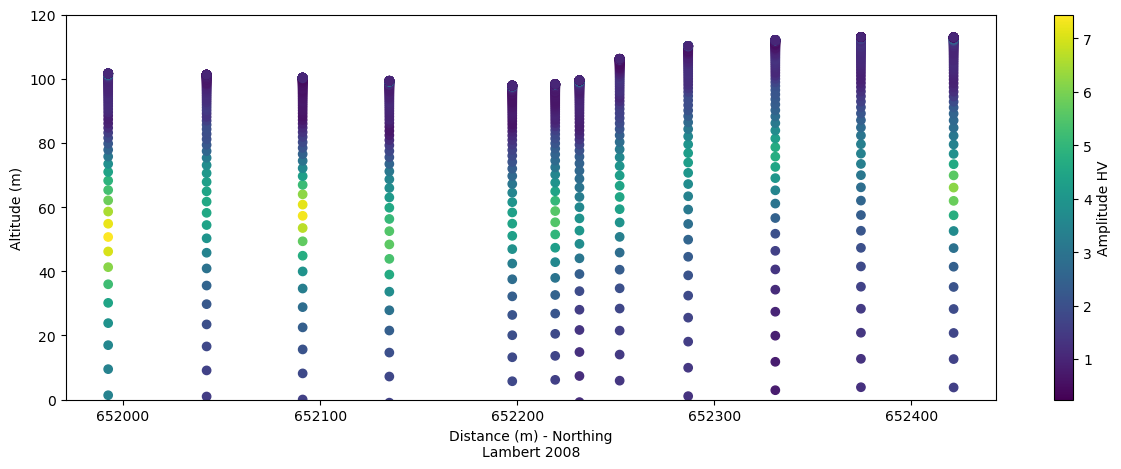

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

norm = Normalize(vmin=Amp.min(), vmax=Amp.max())


for i in range(Amp.shape[1]) :
    lat = loc['ylamb'][i]
    NodeAlti[:,i] = -depth[:,i]+alti.Altitude[i]
    NodeLat[:,i] = np.array([lat]*len(frq))
    lat = loc.ylamb[i]
    a0 = ax.scatter(NodeLat[:,i], NodeAlti[:,i], c=Amp[:,i], norm=norm)
    

clb = plt.colorbar(a0)    
clb.set_label("Amplitude HV")    
#plt.yscale('log')
ax.set_ylabel('Altitude (m)')
ax.set_ylim(0,120)
#ax.invert_yaxis()
ax.set_xlabel('Distance (m) - Northing\nLambert 2008')


## Interpolation the H/V Amplitude between each nodes

### Flat all the array ; Altitude, H/V Amplitude, latitude

In [14]:
#### flatten every array ####
flatAlti = np.ravel(NodeAlti)
flatLat = np.ravel(NodeLat)
FlatAmp = np.ravel(Amp)
#### flatten depth ####

flatDepth = np.ravel(-depth)

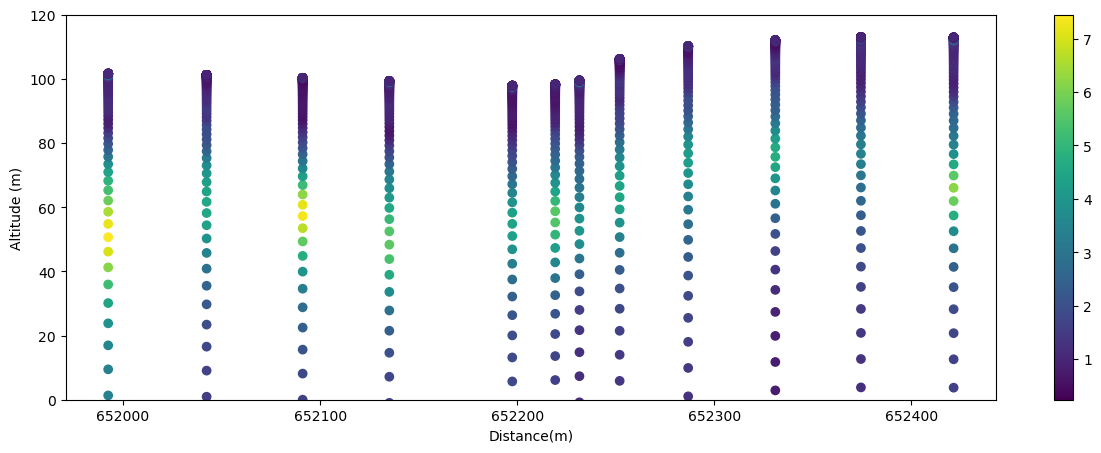

In [15]:
plt.figure(figsize=(15,5))
norm = Normalize(vmin=0,vmax=1.5)
plt.scatter(flatLat, flatAlti, c=FlatAmp)#, norm=norm)
plt.ylim(0,120)
plt.xlabel('Distance(m)')
plt.ylabel('Altitude (m)')
plt.colorbar()

### 2D Linear interpolation of the H/V Amplitude according to the depth (not altitude)

In [16]:
inter = LinearNDInterpolator(list(zip(flatLat, flatDepth)), FlatAmp)

In [17]:
x = np.arange(flatLat.min(), flatLat.max())
y = np.arange(flatDepth.min(),flatDepth.max(), .1)

X,Y = np.meshgrid(x,y)

Z = inter(X,Y)

### Interpolate the altitude according to the latitude

In [18]:
altiInter = np.interp(x, loc.ylamb, alti.Altitude,period=1000)
Y = Y+altiInter  

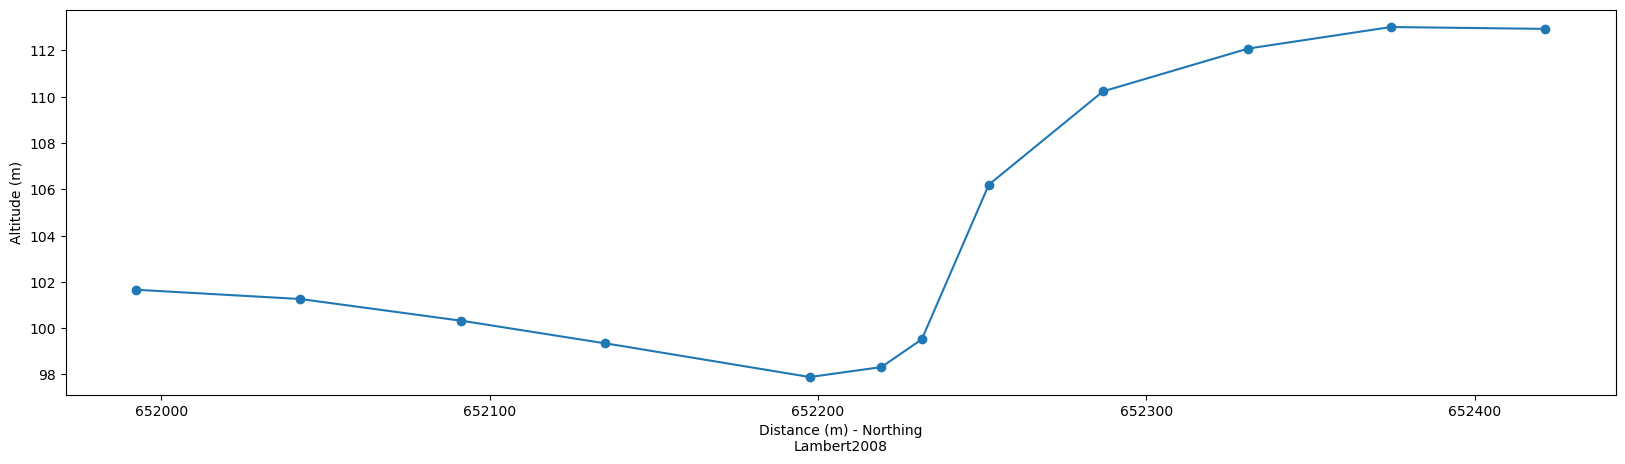

In [19]:
plt.figure(figsize=(20,5))
plt.plot(x, altiInter)
plt.xlabel('Distance (m) - Northing\nLambert2008')
plt.ylabel('Altitude (m)')
plt.scatter(loc.ylamb, alti.Altitude)

## Plotting the 2D H/V amplitude interpolation

C:\Users\julie\AppData\Local\Temp\ipykernel_13980\928965079.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, Zfilt, shading='auto', norm=norm)


Text(0.5, 0, 'Distance (m) - Northing\nLambert2008')

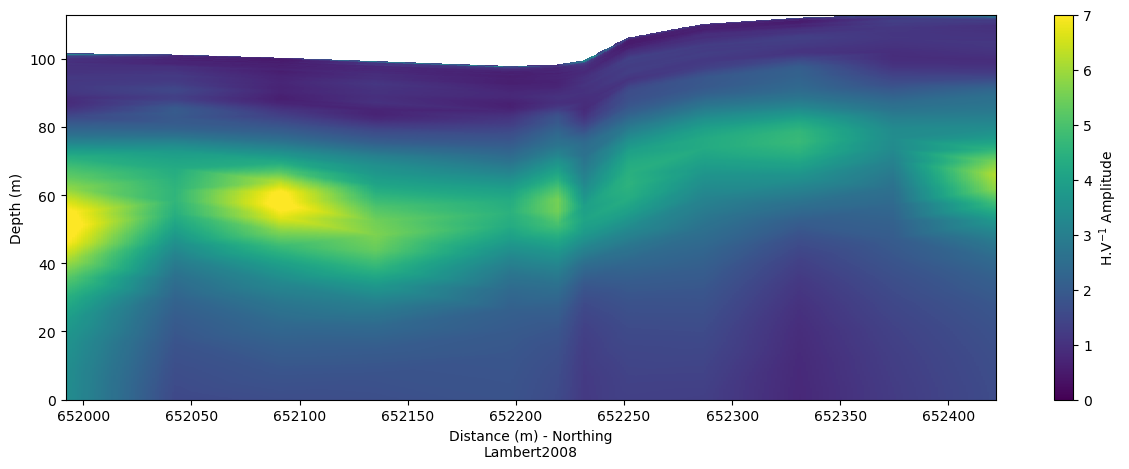

In [20]:
plt.figure(figsize=(15,5))
norm = Normalize(vmin=0,vmax=7)

Zfilt = np.where(Z>FlatAmp.max()+2, np.nan, Z)

plt.pcolormesh(X, Y, Zfilt, shading='auto', norm=norm)
clb = plt.colorbar()
clb.set_label('H.V$^{-1}$ Amplitude')
plt.ylim(0)
plt.ylabel('Depth (m)')
plt.xlabel('Distance (m) - Northing\nLambert2008')